<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Report-Introduction" data-toc-modified-id="Report-Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Report Introduction</a></span></li><li><span><a href="#Data-Background" data-toc-modified-id="Data-Background-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Background</a></span></li><li><span><a href="#Data-Description" data-toc-modified-id="Data-Description-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Description</a></span></li><li><span><a href="#Data-Exploration-and-Analysis" data-toc-modified-id="Data-Exploration-and-Analysis-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Data Exploration and Analysis</a></span><ul class="toc-item"><li><span><a href="#Graphical-Summaries" data-toc-modified-id="Graphical-Summaries-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Graphical Summaries</a></span><ul class="toc-item"><li><span><a href="#Frequencies" data-toc-modified-id="Frequencies-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Frequencies</a></span><ul class="toc-item"><li><span><a href="#Sex" data-toc-modified-id="Sex-4.1.1.1"><span class="toc-item-num">4.1.1.1&nbsp;&nbsp;</span>Sex</a></span></li><li><span><a href="#Diagnosis" data-toc-modified-id="Diagnosis-4.1.1.2"><span class="toc-item-num">4.1.1.2&nbsp;&nbsp;</span>Diagnosis</a></span></li><li><span><a href="#Diagnosis-Method" data-toc-modified-id="Diagnosis-Method-4.1.1.3"><span class="toc-item-num">4.1.1.3&nbsp;&nbsp;</span>Diagnosis Method</a></span></li><li><span><a href="#Localisation" data-toc-modified-id="Localisation-4.1.1.4"><span class="toc-item-num">4.1.1.4&nbsp;&nbsp;</span>Localisation</a></span></li><li><span><a href="#Sex-by-Skin-Lesion-Type" data-toc-modified-id="Sex-by-Skin-Lesion-Type-4.1.1.5"><span class="toc-item-num">4.1.1.5&nbsp;&nbsp;</span>Sex by Skin Lesion Type</a></span></li></ul></li><li><span><a href="#Location-and-Spread" data-toc-modified-id="Location-and-Spread-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>Location and Spread</a></span><ul class="toc-item"><li><span><a href="#Age" data-toc-modified-id="Age-4.1.2.1"><span class="toc-item-num">4.1.2.1&nbsp;&nbsp;</span>Age</a></span></li><li><span><a href="#Age-by-Skin-Lesion-Type" data-toc-modified-id="Age-by-Skin-Lesion-Type-4.1.2.2"><span class="toc-item-num">4.1.2.2&nbsp;&nbsp;</span>Age by Skin Lesion Type</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Conclusions-and-Data-Quality" data-toc-modified-id="Conclusions-and-Data-Quality-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Conclusions and Data Quality</a></span></li></ul></div>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

BASE_PROCESSED_DATA_DIR = '../data/processed'
"""
str: Base processed data directory
"""

PROCESSED_CSV_FILE = BASE_PROCESSED_DATA_DIR + '/processed.csv'
"""
str: HAM1000_metadata.csv metadata file location 
"""
        
# Read datasets in
    
skin_df = pd.read_csv(PROCESSED_CSV_FILE, index_col=0)
"""
pandas.core.frame.DataFrame:: final processed dataframe
"""

# plotting 

lesion_type_label = skin_df[
    ['lesion_type_idx', 'lesion_type']].sort_values(
    'lesion_type_idx').drop_duplicates()['lesion_type']
"""
pandas.core.series.Series: Lesion types (text) series sorted by idx for labels
"""

'\npandas.core.series.Series: Lesion types (text) series sorted by idx for labels\n'

## Report Introduction 

This report documents the Data Understanding stage of the CRISP DM cycle. The Data Understanding
stage involves the process of collecting insights about the data, which are used to help form hypothesis for
later analysis and/or to form results for deployment/modelling to stakeholder. The process involves data descriptions, explorations and quality verification. In this project this would involve analysing the frequencies, spread, location and patterns of skin lesions through population attributes like age.

## Data Background 

As stated in the Business Understanding and Data Preparation Stage reports, the data is provided from a kaggle competition in a dataset called the HAM10000. The dataset consists of a set of dermatoscopic images collected from various populations. The final dataset consists of 10015 images. Ground truths are provided by various confirmation techniques (follow-up examination, expert consensus or in-vivo confocal microscopy). The csv files provided consist of files for the metadata and pixel values (RGB and Luminance of 28 X 28 sizes).

## Data Description 

The full description of the data is covered in the data preparation stage, but to sum up the following fields from the final dataset are formed after preprocessing: 

* lesion_type (textual): The diagnosis (ground truth) as a textual description. Values:
    - Actinic keratoses
    - Basal cell carcinoma
    - Benign keratosis-like lesions
    - Dermatofibroma
    - Melanocytic nevi
    - Melanoma
    - Vascular lesions 
* dx_type (textual): The method of diagnosis, textual. Values: 
    - histopathology follow-up examination (follow_up)
    - expert consensus (consensus)
    - in-vivo confocal microscopy (confocal). 
* lesion_type_idx: codes for diagnosis:
    - 0: Actinic keratoses
    - 1: Basal cell carcinoma
    - 2: Benign keratosis-like lesions
    - 3: Dermatofibroma
    - 4: Melanocytic nevi
    - 5: Melanoma
    - 6: Vascular lesions
* age (numeric): Natural numerical age of the individual the image is taken from.
* sex (textual): Sex of the individual the image is taken from (male, female or unknown).
* localization (textual): Location of skin lesion in individual.
* pixelXXXX_l_28_28 (numeric): Luminance value of images in 28 by 28 pixel representation.
* pixelXXXX_rgb_28_28 (numeric): RGB value of images in 28 by 28 pixel representation. 

In [3]:
skin_df.head()

,pixel0000_rgb_28_28,pixel0001_rgb_28_28,pixel0002_rgb_28_28,pixel0003_rgb_28_28,pixel0004_rgb_28_28,pixel0005_rgb_28_28,pixel0006_rgb_28_28,pixel0007_rgb_28_28,pixel0008_rgb_28_28,pixel0009_rgb_28_28,...,pixel0781_l_28_28,pixel0782_l_28_28,pixel0783_l_28_28,dx_type,age,sex,localization,image_path,lesion_type,lesion_type_idx
0,192,153,193,195,155,192,197,154,185,202,...,140,159,165,histo,80.0,male,scalp,data/raw/HAM10000_images_part_1/ISIC_0027419.jpg,Benign keratosis-like lesions,2
1,25,14,30,68,48,75,123,93,126,158,...,47,18,18,histo,80.0,male,scalp,data/raw/HAM10000_images_part_1/ISIC_0025030.jpg,Benign keratosis-like lesions,2
2,192,138,153,200,145,163,201,142,160,206,...,141,136,115,histo,80.0,male,scalp,data/raw/HAM10000_images_part_1/ISIC_0026769.jpg,Benign keratosis-like lesions,2
3,38,19,30,95,59,72,143,103,119,171,...,32,16,16,histo,80.0,male,scalp,data/raw/HAM10000_images_part_1/ISIC_0025661.jpg,Benign keratosis-like lesions,2
4,158,113,139,194,144,174,215,162,191,225,...,181,147,88,histo,75.0,male,ear,data/raw/HAM10000_images_part_2/ISIC_0031633.jpg,Benign keratosis-like lesions,2



## Data Exploration and Analysis

This section concentrates on the process of exploring the data for patterns and interesting features using
Exploratory Data Analysis,

### Graphical Summaries 

#### Frequencies 

##### Sex 

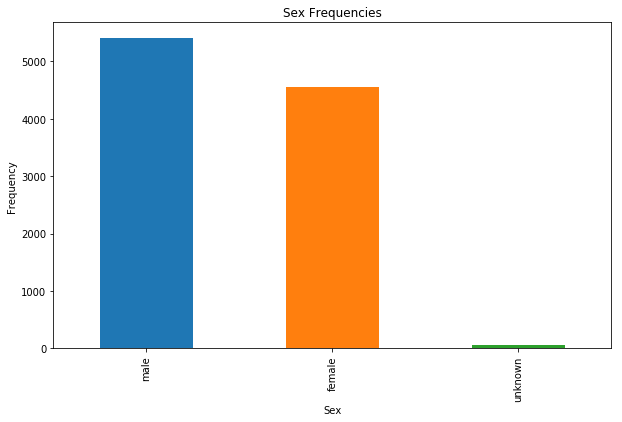

In [8]:
# sex frequency (value counts) bar plot 

skin_df['sex'].value_counts().plot(kind='bar')

# Labels and titles

plt.title('Sex Frequencies')
plt.xlabel('Sex')
plt.ylabel('Frequency')

plt.rcParams['figure.figsize'] = [10, 6]

As can be seen in the frequency bar plot - while not overwhelmingly higher than females - the majority of the sample population are male. Lastly, 'unknown' sexes account for a very small percentage of the population sex and hence it is going to be difficult to make statements about that category with high confidence.

##### Diagnosis 


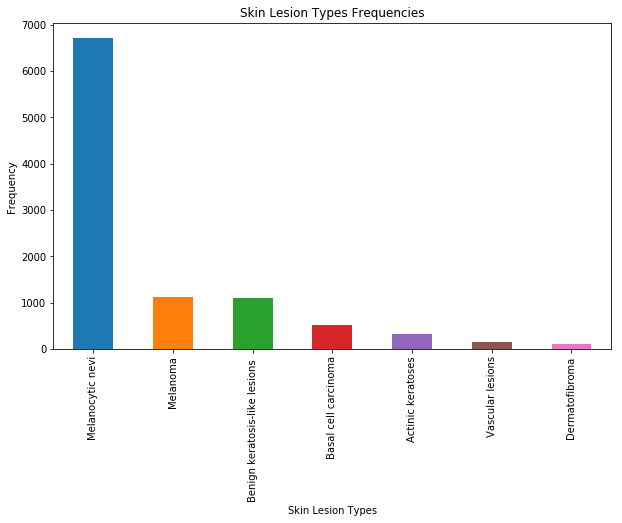

In [10]:
# diagnosis frequency (value counts) bar plot 

skin_df['lesion_type'].value_counts().plot(kind='bar')

# Labels and titles

plt.xticks(rotation='vertical')
plt.title('Skin Lesion Types Frequencies')
plt.xlabel('Skin Lesion Types')
plt.ylabel('Frequency')

plt.rcParams['figure.figsize'] = [10, 6]

The most common lesion and overwhelmingly so is nevi as it is more than 5 times larger than the second most common lesion (melanoma). Both Dematofibroma and Vascular lesions account for a very small minority of the lesions as they are less than half the next lesion type (Actinic Keratoses). 

##### Diagnosis Method

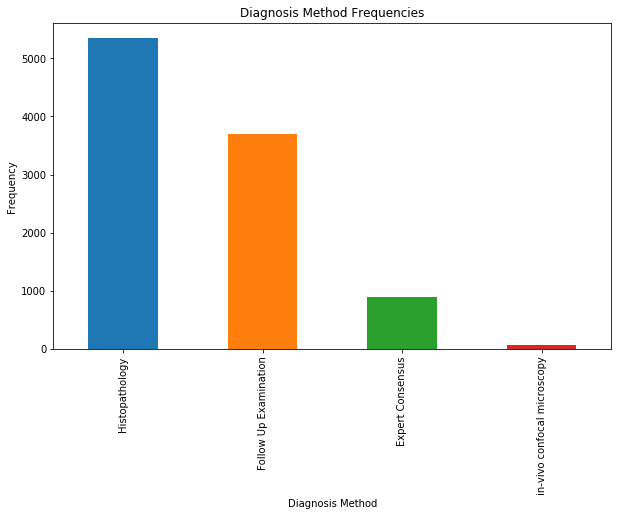

In [11]:
# diagnosis method frequency (value counts) bar plot 

skin_df['dx_type'].value_counts().plot(kind='bar')

# Labels and titles

plt.xticks([0, 1, 2, 3], ['Histopathology','Follow Up Examination',
                          'Expert Consensus','in-vivo confocal microscopy'],
           rotation='vertical')
plt.title('Diagnosis Method Frequencies')
plt.xlabel('Diagnosis Method')
plt.ylabel('Frequency')

plt.rcParams['figure.figsize'] = [10, 6]

When it comes to diagnosis methods, it seems various different methods were used to come up with the ground truths. This is mostly done by Histopathology and Follow Ups, but a small number of them rely on Expert Consensus and In-Vivo Vonfocal Microscopy.

##### Localisation 

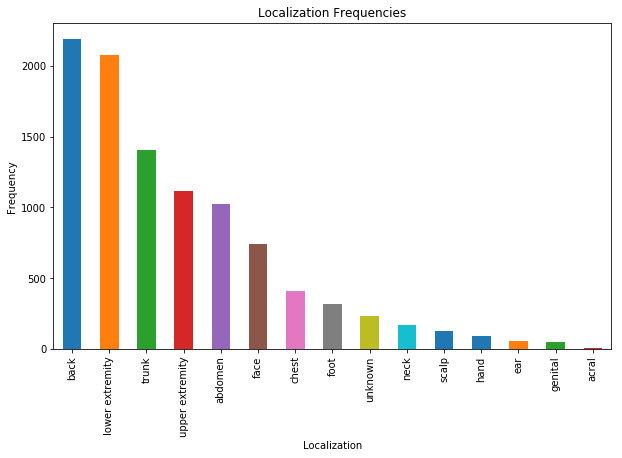

In [12]:
# localisation frequency (value counts) bar plot 

skin_df['localization'].value_counts().plot(kind='bar')

# Labels and titles

plt.title('Localization Frequencies')
plt.xlabel('Localization')
plt.ylabel('Frequency')

plt.rcParams['figure.figsize'] = [10, 6]

The Localization of lesions seems to spread around various parts of the body, but are more common on extremities, the back and trunk.

##### Sex by Skin Lesion Type

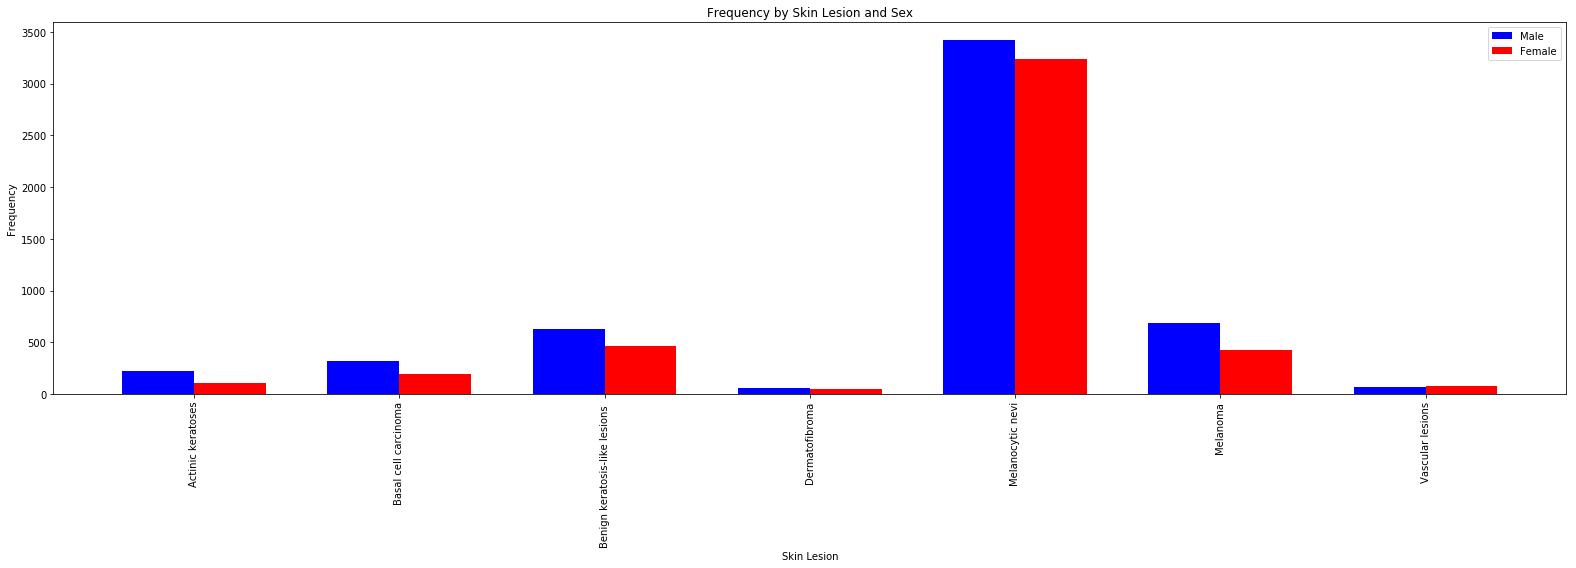

In [5]:
def group_by_lesion(df):
    """
    Used to group len of lesions for a df
    """
    return( ( len(df[df['lesion_type_idx'] == 0]),
              len(df[df['lesion_type_idx'] == 1]),
              len(df[df['lesion_type_idx'] == 2]),
              len(df[df['lesion_type_idx'] == 3]),
              len(df[df['lesion_type_idx'] == 4]),
              len(df[df['lesion_type_idx'] == 5]),
              len(df[df['lesion_type_idx'] == 6])
             ) )

bar_width = 0.35
n_lesion = len(skin_df['lesion_type'].drop_duplicates())
             
# find frequencies for each sex

male_freq = group_by_lesion(skin_df[skin_df['sex']  == 'male'])
female_freq = group_by_lesion(skin_df[skin_df['sex']  == 'female'])
unknown_freq = group_by_lesion(skin_df[skin_df['sex']  == 'unknown'])

# set up subplot

fig, ax = plt.subplots()
index = np.arange(n_lesion)

# Draw bars
 
ax.bar(index, male_freq, bar_width, color='b', label='Male')
ax.bar(index + bar_width, female_freq, bar_width, color='r', label='Female')

# set labels, titles and legends

ax.set_xlabel('Skin Lesion')
ax.set_ylabel('Frequency')
ax.set_title('Frequency by Skin Lesion and Sex')
# plot using labels from lesion type sorted by idx
plt.xticks([i for i, _ in enumerate(lesion_type_label)],
           lesion_type_label, rotation='vertical')
ax.set_xticks(index + bar_width / 2)
ax.legend()

# Draw plot

fig.tight_layout()
plt.rcParams['figure.figsize'] = [22, 8]
plt.show()

As previously stated, unknown accounted a very small proportion of the sex labels and because it is by default "unknown", it is not plotted. 

Nonetheless, as previously stated the number of males in the pool is noticeably higher which is shown here in most lesion types. Hence, males seem to be more likely to encounter lesions according to this sample.

#### Location and Spread

##### Age


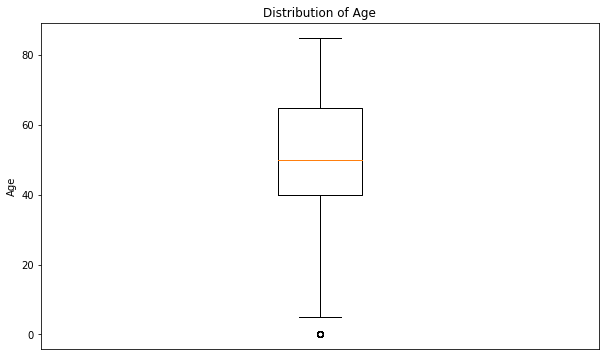

In [13]:
# box plot with labels

plt.boxplot(skin_df['age'])
plt.title('Distribution of Age')
plt.ylabel('Age')

# drop x axis

plt.tick_params(axis='x', which='both',
                bottom=False, top=False, labelbottom=False) 

plt.rcParams['figure.figsize'] = [10, 6]
plt.show()

This box plot shows that the most common ages are around 40 to 60 according to the quantiles, but there are not many outlier points which suggests that ages outside this range are not exceedingly rare and the age range is representative.

##### Age by Skin Lesion Type


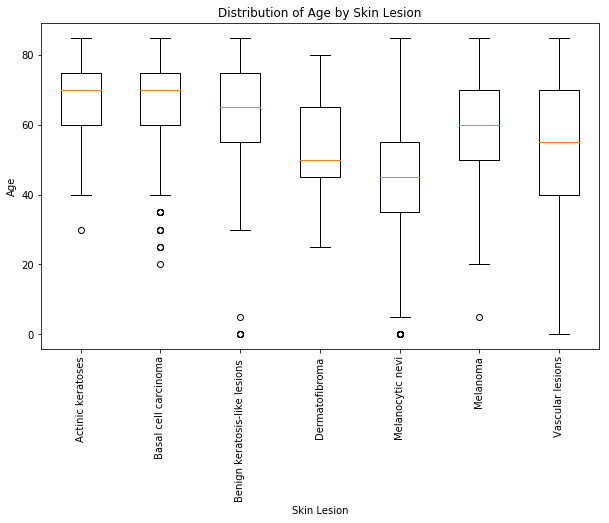

In [13]:
# group age by lesion type 

plt.boxplot([skin_df[skin_df['lesion_type_idx'] == 0]['age'],
            skin_df[skin_df['lesion_type_idx'] == 1]['age'],
            skin_df[skin_df['lesion_type_idx'] == 2]['age'],
            skin_df[skin_df['lesion_type_idx'] == 3]['age'],
            skin_df[skin_df['lesion_type_idx'] == 4]['age'],
            skin_df[skin_df['lesion_type_idx'] == 5]['age'],
            skin_df[skin_df['lesion_type_idx'] == 6]['age']])
 
# setup labels and titles

plt.title('Distribution of Age by Skin Lesion')
plt.xlabel('Skin Lesion')
plt.ylabel('Age')
# plot using labels from lesion type sorted by idx
plt.xticks([i+1 for i, _ in enumerate(lesion_type_label)],
           lesion_type_label, rotation='vertical')

# draw plot

plt.rcParams['figure.figsize'] = [10, 6]
plt.show()

It can be seen that lesion types Vascular and Melanocytic lesions have the widest ranges, and Vascular lesions in particular have a wide inter quantile range which suggests that it is one of the types of lesions that are least dependent on age. One the other hand Basal Cell Carcinoma and Actinic Keratoses seem to occur more often at higher ages. Lastly, it seems that they are many lesions that are dependent on old age as the median and quantiles are generally in the higher end of the table.

## Conclusions and Data Quality 



To conclude, the exploratory analysis of the data shows that skin lesions are more likely to occur at extremities, the back and trunk. Also, lesions are overwhelmingly of the Melanocytic Nevi type, and that lesions have varying degrees of dependence on age with some getting effected less than others. These observations might be useful during the modelling stage. 

However, several issues with the data were recognised. As stated before, some of the sexes are unknown and the mention of whether these unknown sexes are simply unknown or are non-binary/non-conforming is missing. But, they form a very small proportion of the data so they are not likely to cause major issue. Lastly, the ground truths were obtained by various methods including expert consensus, which might effect the consistency of the classification. However, since all methods are medically sound or rely on domain experts, it is unlikely that this will cause major issue. But, it seems that the skin_lesion condition frequencies are dominated by nevi compared to other conditions - in particular vascular ones and dermatofibroma.